# Preço Contratual VS Preço Total Efetivo

Estudo da questão dos preços contratuais e preço total efetivo

Existem contratos em que o preço contratual é demasiado baixo, no valor de alguns cêntimos apenas. Este, normalmente, é o valor por quantidade, km ou outra unidade qualquer. Quando o preço contratual é de alguns cêntimos/euros, o preço total efetivo é o valor total pago pela entidade contratante à contratada.

O objetivo é fazer uma representação gráfica dos preços contratuais de modo a averiguar se existem várias modas para, posteriormente, fazer uma classificação/ construir diferentes intervalos de preços.

Contudo, é preciso excluir todos os preços contratuais que tomam valores nulos ou muito baixos. 

O array dos preços contratuais vai ser construído da seguinte forma : 

- consideram-se todos os valores de preço contratual
- substituem-se todos os preços contratuais pelo preço total efetivo nos casos em que o último campo esteja preenchido

In [1]:
import psycopg2
from psycopg2 import OperationalError
from psycopg2 import sql

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats as st

from datetime import datetime, timedelta

import os
from dotenv import load_dotenv
dotenv_path = os.path.expanduser('~/.pwds.env')
load_dotenv(dotenv_path)



# Conexão à base de dados
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')


conn = psycopg2.connect(
                host = db_host,
                port = db_port,
                user = db_user,
                password = db_password
        )

In [2]:
cur = conn.cursor()
cur.execute('''
            SELECT preco_contratual, contratos_basegov."totalEffectivePrice"
            FROM contratos_basegov
            WHERE tipo_procedimento = 'Concurso público' AND preco_contratual >= 0;
            ''')

pc = pd.DataFrame(cur.fetchall())

In [3]:
pc

,0,1
0,102300.00,102300.0
1,9000.00,NaN
2,11850.00,NaN
3,6500.00,NaN
4,11100.00,NaN
...,...,...
123288,6225.00,NaN
123289,1342818.24,NaN
123290,67229.04,NaN
123291,2880.00,NaN


In [4]:
# Lista de todos os índices da dataframe
all_index = pc.index.values

In [5]:
# Índices dos contratos com preço total efetivo preenchido
notnan = np.where(pc.iloc[:,1] >= 0)[0]

In [6]:
# Preço total efetivo
pte = pc.iloc[notnan,1]

In [7]:
# Índices dos contratos com preço total efetivo não preenchido.
other_index = np.setdiff1d(all_index, notnan)

In [8]:
# Os casos em que o preço total efetivo não está preenchido e o preço contatual é nulo, seguramente, devem-se a erros de preenchimento na plataforma
# Preços contratuais para contratos com preço total efetivo não preenchido
pcontr = pc.iloc[other_index,0]

In [9]:
# Junção dos dois arrays
# É preciso excluir os valores nulos que ainda se encontram em pcontr (???)
prices = np.concatenate((pte,pcontr))

In [10]:
prices = prices[np.where(prices != 0)[0]]

In [12]:
coiso = np.where(np.logical_and(prices < 400_000, prices > 500))[0]

In [ ]:
plt.hist(prices[coiso], bins = 5000)
plt.show()

<Axes: >

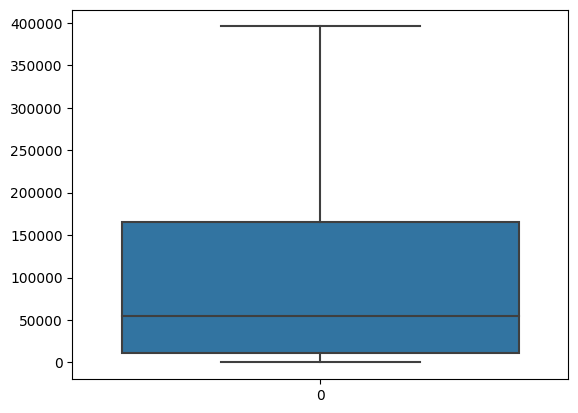

In [201]:
sns.boxplot(prices, showfliers=False)

In [198]:
unique_values, counts = np.unique(prices, return_counts=True)

ind = np.where(counts > 50)[0]

for i in ind:
    print(unique_values[i], counts[i])

600.0 52
1500.0 51
3000.0 149
6000.0 60
9000.0 56
10000.0 73
12000.0 71
15000.0 113
18000.0 77
20000.0 150
24000.0 64
25000.0 92
30000.0 188
35000.0 109
36000.0 62
40000.0 99
45000.0 110
48000.0 51
50000.0 159
54000.0 51
55000.0 70
60000.0 154
70000.0 109
72000.0 56
75000.0 139
80000.0 88
85000.0 51
90000.0 145
95000.0 51
100000.0 168
110000.0 54
120000.0 144
130000.0 62
135000.0 63
140000.0 51
150000.0 159
180000.0 82
200000.0 117
210000.0 82
250000.0 54
300000.0 52


/tmp/ipykernel_16051/3633659184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices[coiso], hist=True, kde=False,


<Axes: >

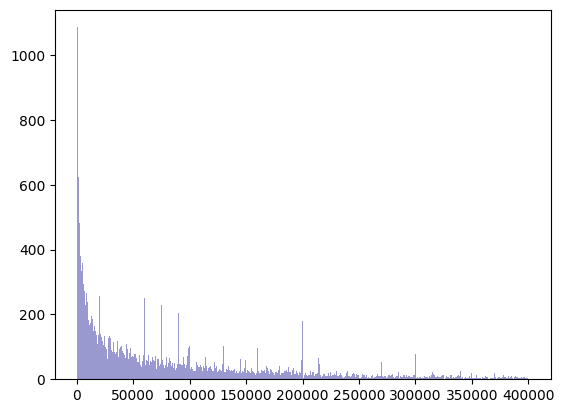

In [18]:
sns.distplot(prices[coiso], hist=True, kde=False, 
             bins=2500, color = 'darkblue')

In [19]:
np.max(pcontr)

397191013.95